In [30]:
#Useful imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

import sys 
sys.path.append("../../")
from pyACC.Cosmology import Integrand_comoving_distance
from pyACC.Cosmology import comoving_distance

**Compute cosmological distances**

In this exercise, integration will be applied  in a cosmological context computing cosmological distances.

The basis to compute distances is the Hubble function $H(z)$, which describes the evolution of the backgroud.

For flat $\Lambda$ CDM cosmology it reads:
$$
D_c(z)=\int_0^z \frac{dz'c}{H\left(z'\right)}
$$

Implementing $H(z)$ in different cosmological models allows to define distances in the contenst that is being studied.

From the non observable $D_c(z)$, it is possible to estimate different typologies of distances:
1. Angular diameter distance: $D_A(z)=\frac{D_c(z)}{1+z}$;
2. Luminosity distance: $D_L(z)=D_c(z)\cdot(1+z)$;

It is customary to introduce the "Distance modulus" $m$, definied as the difference between the apparent magnitude and the absolute magnitude of an object.
Trere are two important relations:
1. $m = 5\log_{10}\left(\frac{D_L(z)}{10pc}\right)$;
2. $m = 5\log_{10}\left(\frac{D_C(z)}{10pc}\right)+25$
where distances are expressed in pc and the constant $10 pc$ is chosen so that the distance modulus is on a logarithmic scale.

In [31]:
#Defining Hubble function
Omega_mat = 0.3
H_0       = 67

def Hubble_function(z, Omega_mat, H_0):
    return H_0*(Omega_mat*(1+z)**3+1-Omega_mat)**0.5

In [32]:
#Defining z array
z_min = 0.1
z_max = 2
z_list = np.linspace(z_min, z_max, 100)

In [33]:
#Computing comoving distances 
#List of distances to be filled
d_list = []

# Calculate the comoving distance at each redshift in z_list
for i in range(len(z_list)):
    comoving_distances = comoving_distance(z_list[i], Hubble_function, Omega_mat, H_0)
    d_list.append(comoving_distances)
 
print('Check of d_list length: ', len(d_list))

Check of d_list length:  100


In [34]:
#Computing distance modulus
d_modulus_list = []

for i in range(len(d_list)):
    m = 5*np.log10(d_list[i]*1e5) + 25
    d_modulus_list.append(m)

print('Check of d_modulus_list length: ', len(d_modulus_list))

Check of d_modulus_list length:  100


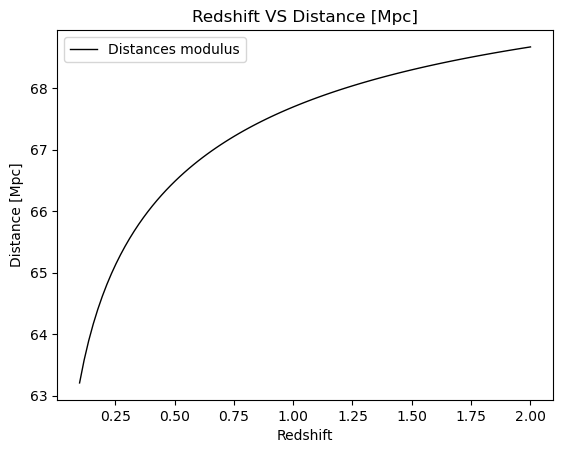

In [35]:
#Printing distances modulus
plt.plot(z_list, d_modulus_list, lw=1, color="k", label="Distances modulus") #lw makes line thicker, scatter instead of plot not to have a line, but points
#WARNING!
#FUN FACT: first attempt, plot was givin few point on the same level! Of course: z is separated by 0.1 and 0.1 was the step of trapezoid, function used to integrate!
plt.title("Redshift VS Distance [Mpc]")
plt.legend()
#plt.xscale('log')
plt.xlabel("Redshift")
plt.ylabel("Distance [Mpc]");


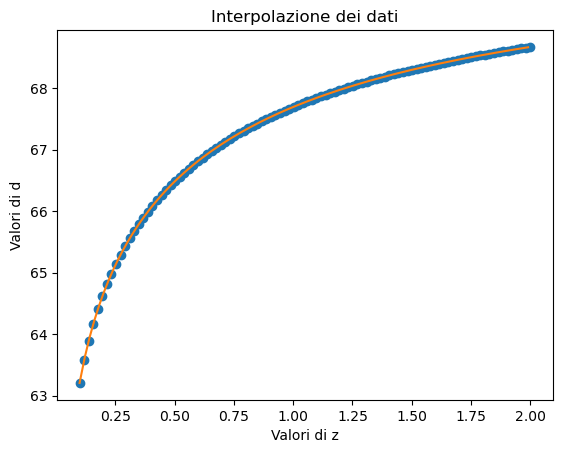

189000
100


In [39]:
#Interpolation 1D
#Function resulting from interpolate
f = interpolate.interp1d(z_list, d_modulus_list, kind='linear', bounds_error='false', fill_value=np.nan) 
#interp1d takes x and y, interpoles with kind; fill_value allows you to define value out of range: in this case, nan

#Wanting to have access to all points f has calculated
delta_z_new = 0.00001

z_list_new = np.arange(z_min, z_max-0.01, delta_z_new)

d_list_new = f(z_list_new)   # use interpolation function returned by `interp1d`

plt.plot(z_list, d_modulus_list, 'o', z_list_new, d_list_new, '-')
plt.xlabel('Valori di z')
plt.ylabel('Valori di d')
plt.title('Interpolazione dei dati')
plt.show()

print(len(z_list_new))
print(len(z_list))

In [ ]:
# - just a 1D interpolation, but then I don't get the cryptic advice of 3D interpolation reduction do 1D. 